In [1]:
#Downloding Microsoft Stocks data from YahooFinance
!pip install yfinance

import yfinance as yf
msft=yf.Ticker("MSFT")
msft=msft.history(period='max')

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/09/82/5a5eee685095a6c1f8968db75bba8536baa8046c970be25e1ac91a843839/yfinance-0.2.33-py2.py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/b6/2c/e391d6d57bbd837d383a6b69b54ecb4768d75b31d8bc7a380b4b4afe4cb2/frozendict-2.3.10-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.9 MB 1.3 MB/s eta 0:00:03
     - -------------------------------------- 0.1/2.9 MB 1.6 MB/s eta 0:00:02
     --- ------------------------------------ 0.2/2.9 MB 2.1 MB/s eta 0:00:02
     ------ --------------------------------- 0.5/2.9 MB 3.1 MB/s eta 0:00:01
     ----------- ---------------------------- 0.9/2.9 MB 4.3 MB/s eta 0:00:01
     ----------------- -------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [23]:
import pandas as pd

In [2]:
msft.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.054893,0.062965,0.054893,0.060274,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.060274,0.063503,0.060274,0.062427,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062427,0.064042,0.062427,0.063503,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.063504,0.064042,0.061350,0.061889,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.061889,0.062427,0.060274,0.060812,47894400,0.0,0.0


In [7]:
import matplotlib.pyplot as plt

<Axes: xlabel='Date'>

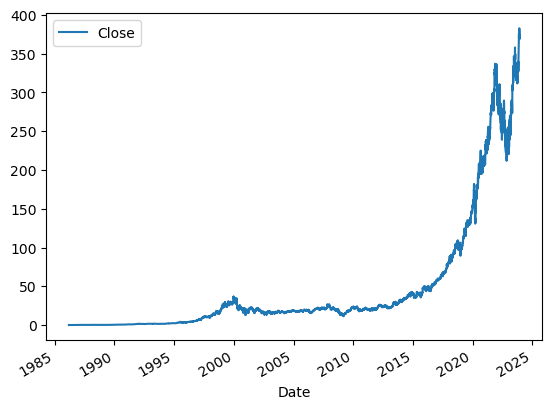

In [9]:
msft.plot.line(y="Close",use_index=True)

In [12]:
data=msft[["Close"]]
data=data.rename(columns={'Close':'Actual Close'})
data["Target"]=msft.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"]

In [13]:
data.head(5)

,Actual Close,Target
Date,,
1986-03-13 00:00:00-05:00,0.060274,NaN
1986-03-14 00:00:00-05:00,0.062427,1.0
1986-03-17 00:00:00-05:00,0.063503,1.0
1986-03-18 00:00:00-05:00,0.061889,0.0
1986-03-19 00:00:00-05:00,0.060812,0.0


In [14]:
msft_prev=msft.copy()

In [15]:
msft_prev=msft_prev.shift(1)

In [17]:
msft_prev.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-03-14 00:00:00-05:00,0.054893,0.062965,0.054893,0.060274,1.031789e+09,0.0,0.0
1986-03-17 00:00:00-05:00,0.060274,0.063503,0.060274,0.062427,3.081600e+08,0.0,0.0
1986-03-18 00:00:00-05:00,0.062427,0.064042,0.062427,0.063503,1.331712e+08,0.0,0.0
1986-03-19 00:00:00-05:00,0.063504,0.064042,0.061350,0.061889,6.776640e+07,0.0,0.0


In [18]:
predictors=["Close", "High", "Open", "Low", "Volume"]
data=data.join(msft_prev[predictors]).iloc[1:]

In [19]:
data.head()

,Actual Close,Target,Close,High,Open,Low,Volume
Date,,,,,,,
1986-03-14 00:00:00-05:00,0.062427,1.0,0.060274,0.062965,0.054893,0.054893,1.031789e+09
1986-03-17 00:00:00-05:00,0.063503,1.0,0.062427,0.063503,0.060274,0.060274,3.081600e+08
1986-03-18 00:00:00-05:00,0.061889,0.0,0.063503,0.064042,0.062427,0.062427,1.331712e+08
1986-03-19 00:00:00-05:00,0.060812,0.0,0.061889,0.064042,0.063504,0.061350,6.776640e+07
1986-03-20 00:00:00-05:00,0.059198,0.0,0.060812,0.062427,0.061889,0.060274,4.789440e+07


In [79]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=100,min_samples_split=200, random_state=1)

train=data.iloc[:-50]
test=data.iloc[-50:]

model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=200, random_state=1)

In [80]:
from sklearn.metrics import precision_score

preds=model.predict(test[predictors])
preds

array([1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [81]:
preds=pd.Series(preds, index=test.index)

In [82]:
preds

Date
2023-10-03 00:00:00-04:00    1.0
2023-10-04 00:00:00-04:00    0.0
2023-10-05 00:00:00-04:00    1.0
2023-10-06 00:00:00-04:00    0.0
2023-10-09 00:00:00-04:00    1.0
2023-10-10 00:00:00-04:00    0.0
2023-10-11 00:00:00-04:00    1.0
2023-10-12 00:00:00-04:00    0.0
2023-10-13 00:00:00-04:00    0.0
2023-10-16 00:00:00-04:00    1.0
2023-10-17 00:00:00-04:00    1.0
2023-10-18 00:00:00-04:00    0.0
2023-10-19 00:00:00-04:00    1.0
2023-10-20 00:00:00-04:00    1.0
2023-10-23 00:00:00-04:00    1.0
2023-10-24 00:00:00-04:00    1.0
2023-10-25 00:00:00-04:00    1.0
2023-10-26 00:00:00-04:00    0.0
2023-10-27 00:00:00-04:00    0.0
2023-10-30 00:00:00-04:00    1.0
2023-10-31 00:00:00-04:00    0.0
2023-11-01 00:00:00-04:00    0.0
2023-11-02 00:00:00-04:00    0.0
2023-11-03 00:00:00-04:00    0.0
2023-11-06 00:00:00-05:00    0.0
2023-11-07 00:00:00-05:00    0.0
2023-11-08 00:00:00-05:00    0.0
2023-11-09 00:00:00-05:00    0.0
2023-11-10 00:00:00-05:00    0.0
2023-11-13 00:00:00-05:00    0.0
2023-

In [83]:
precision_score(test["Target"], preds)

0.75

In [86]:
combined=pd.concat({"Target": test["Target"], "Predictions": preds}, axis=1)
combined

,Target,Predictions
Date,,
2023-10-03 00:00:00-04:00,0.0,1.0
2023-10-04 00:00:00-04:00,1.0,0.0
2023-10-05 00:00:00-04:00,1.0,1.0
2023-10-06 00:00:00-04:00,1.0,0.0
2023-10-09 00:00:00-04:00,1.0,1.0
2023-10-10 00:00:00-04:00,0.0,0.0
2023-10-11 00:00:00-04:00,1.0,1.0
2023-10-12 00:00:00-04:00,0.0,0.0
2023-10-13 00:00:00-04:00,0.0,0.0


<Axes: xlabel='Date'>

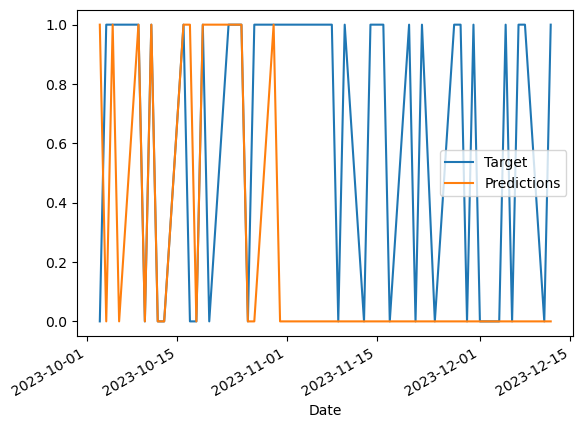

In [90]:
combined.plot()

## Creating a Backtesting Engine


In [109]:
start=1000
step=750
i=1000

def backtest(data, model, predictors, start=1000, step=750):
    predictions = []
    for i in range(start, data.shape[0], step):


        train=data.iloc[0:i].copy()
        test=data.iloc[i:(i+step)].copy()

        model.fit(train[predictors], train["Target"])

        preds=model.predict_proba(test[predictors])[:,1]   ## The output is a 2 row array that shows the probabilities of 0 and 1 output.   putting [:,1] shows the probability of 1 as an output.
        preds = pd.Series(preds, index=test.index)
        preds[preds > .6] = 1
        preds[preds < .6] = 0

        combined=pd.concat({"Target":test["Target"], "Predictions":preds}, axis=1)
        predictions.append(combined)

    predictions = pd.concat(predictions)  
    return predictions

In [92]:
train

,Actual Close,Target,Close,High,Open,Low,Volume
Date,,,,,,,
1986-03-14 00:00:00-05:00,0.062427,1.0,0.060274,0.062965,0.054893,0.054893,1.031789e+09
1986-03-17 00:00:00-05:00,0.063503,1.0,0.062427,0.063503,0.060274,0.060274,3.081600e+08
1986-03-18 00:00:00-05:00,0.061889,0.0,0.063503,0.064042,0.062427,0.062427,1.331712e+08
1986-03-19 00:00:00-05:00,0.060812,0.0,0.061889,0.064042,0.063504,0.061350,6.776640e+07
1986-03-20 00:00:00-05:00,0.059198,0.0,0.060812,0.062427,0.061889,0.060274,4.789440e+07
...,...,...,...,...,...,...,...
1990-02-20 00:00:00-05:00,0.431607,1.0,0.421920,0.425149,0.422996,0.420843,7.087680e+07
1990-02-21 00:00:00-05:00,0.413847,0.0,0.431607,0.432683,0.420843,0.417614,1.326528e+08
1990-02-22 00:00:00-05:00,0.414924,1.0,0.413847,0.430530,0.425149,0.412233,1.033488e+08


In [94]:
test

,Actual Close,Target,Close,High,Open,Low,Volume
Date,,,,,,,
1990-02-27 00:00:00-05:00,0.421920,0.0,0.427301,0.430530,0.419767,0.418691,69220800.0
1990-02-28 00:00:00-05:00,0.425149,1.0,0.421920,0.428378,0.428378,0.421920,62020800.0
1990-03-01 00:00:00-05:00,0.430530,1.0,0.425149,0.429454,0.421920,0.421920,39312000.0
1990-03-02 00:00:00-05:00,0.446675,1.0,0.430530,0.438065,0.424073,0.424073,76867200.0
1990-03-05 00:00:00-05:00,0.453133,1.0,0.446675,0.449366,0.431607,0.431069,100209600.0
...,...,...,...,...,...,...,...
1993-02-05 00:00:00-05:00,1.724274,1.0,1.646778,1.700057,1.700057,1.637092,124214400.0
1993-02-08 00:00:00-05:00,1.661310,0.0,1.724274,1.733961,1.641936,1.593501,177216000.0
1993-02-09 00:00:00-05:00,1.624983,0.0,1.661310,1.724274,1.714587,1.646779,92665600.0


In [104]:
predictions["Predictions"].value_counts()

Predictions
0.0    7793
1.0     721
Name: count, dtype: int64

In [106]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5104022191400832

## Improving the accuracy

In [111]:
## Adding more predictors

weekly_mean = data.rolling(7).mean()
quarterly_mean = data.rolling(90).mean()
annual_mean = data.rolling(365).mean()

weekly_trend = data.shift(1).rolling(7).mean()["Target"]

In [112]:
data["weekly_mean"] = weekly_mean["Close"] / data["Close"]
data["quarterly_mean"] = quarterly_mean["Close"] / data["Close"]
data["annual_mean"] = annual_mean["Close"] / data["Close"]

data["annual_weekly_mean"] = data["annual_mean"] / data["weekly_mean"]
data["annual_quarterly_mean"] = data["annual_mean"] / data["quarterly_mean"]
data["weekly_trend"] = weekly_trend

data["open_close_ratio"] = data["Open"] / data["Close"]
data["high_close_ratio"] = data["High"] / data["Close"]
data["low_close_ratio"] = data["Low"] / data["Close"]

In [113]:
full_predictors = predictors + ["weekly_mean", "quarterly_mean", "annual_mean", "annual_weekly_mean", "annual_quarterly_mean", "open_close_ratio", "high_close_ratio", "low_close_ratio", "weekly_trend"]
predictions = backtest(data.iloc[365:], model, full_predictors)

In [114]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5709969788519638

In [115]:
# Show how many trades we would make

predictions["Predictions"].value_counts() 

Predictions
0.0    7818
1.0     331
Name: count, dtype: int64

<Axes: xlabel='Date'>

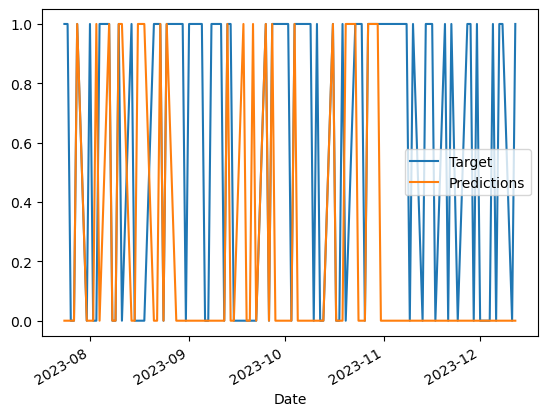

In [118]:
predictions.iloc[-100:].plot()